# Proyecto Señales y Sistemas

## Curso 1: Conceptos Basico y Algoritmos

### Semana 1 

#### Señales discretas y continuas, ejemplos de señal escalon impulso, karpus

<StemContainer object of 3 artists>

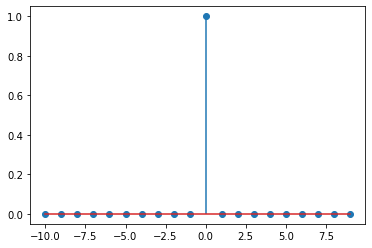

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t= np.arange (-10,10,1)
s=(t==0)*1.0
plt.stem(t,s)


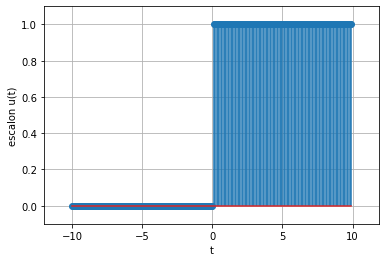

In [100]:
# INGRESO
#u = lambda t: np.piecewise(t,t>=0,[1,0])
u = lambda t: np.heaviside(t,1)
a = -10
b = 10
dt = 0.1

# PROCEDIMIENTO
ti  = np.arange(a, b, dt)
u0_i = u(ti)

# SALIDA - GRAFICA

# grafica
plt.figure(1)
plt.stem(ti,u0_i)

plt.xlabel('t')
plt.ylabel('escalon u(t)')
plt.margins(dt)
plt.grid()
plt.show()

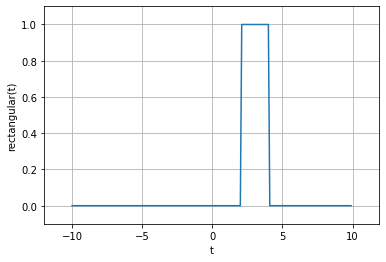

In [11]:
# Rectangular como u(t-2)-u(t-4)
# u2 = lambda t: np.piecewise(t,t>=2,[1,0])
# u4 = lambda t: np.piecewise(t,t>=4,[1,0])

u2 = lambda t: u(t-2)
u4 = lambda t: u(t-4)
rectangular = lambda t:u2(t) - u4(t)
rect_i = rectangular(ti)

# SALIDA - GRAFICA
plt.figure(3)
plt.plot(ti,rect_i)

plt.xlabel('t')
plt.ylabel('rectangular(t)')
plt.margins(dt)
plt.grid()
plt.show()

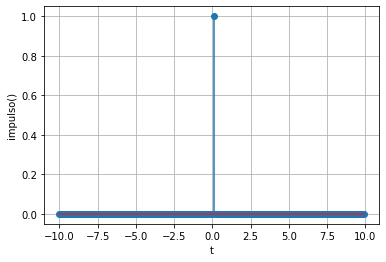

In [12]:
# Señales impulso unitario
import numpy as np
import matplotlib.pyplot as plt

# INGRESO
# u = lambda t: np.piecewise(t,t>=0,[1,0])
u = lambda t: np.heaviside(t,1)

impulso = lambda t,dt: u(t)-u(t-dt)

# intervalo de observación
a = -10
b = 10

dt = 0.1  # tamaño de paso
t0 = 0    # punto de impulso

# PROCEDIMIENTO
ti  = np.arange(a, b, dt)
impulso_i = impulso(ti,dt)

# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.stem(ti,impulso_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

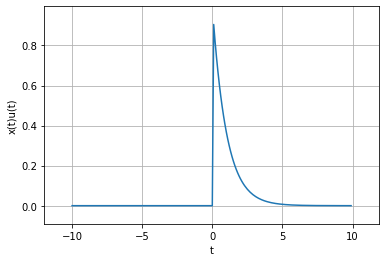

In [13]:
# señal a causal
x = lambda t: np.exp(-t)*u(t)
xi = x(ti)

# SALIDA - GRAFICA
plt.figure(2)
plt.plot(ti,xi)

plt.xlabel('t')
plt.ylabel('x(t)u(t)')
plt.margins(dt)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Unit Ramp r[n]')

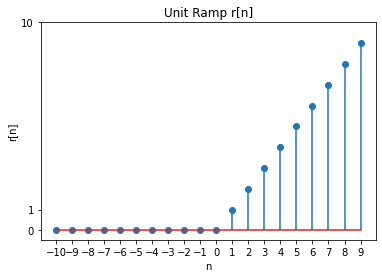

In [14]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
    
def unit_ramp(n):
    ramp =[]
    for sample in n:
        if sample<0:
            ramp.append(0)
        else:
            ramp.append(sample)
    return ramp
  
UL = 10
LL = -10
n = np.arange(LL, UL, 1)
r = unit_ramp(n)
plt.stem(n, r)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 1))
plt.yticks([0, UL, 1])
plt.ylabel('r[n]')
plt.title('Unit Ramp r[n]')

Text(0.5, 1.0, 'Exponential Signal e**(an)')

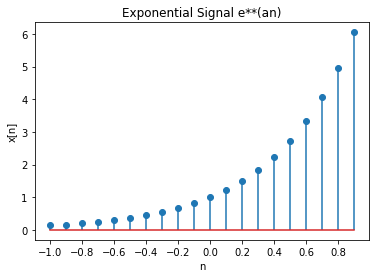

In [15]:
# Function to generate exponential signals e**(at)
def exponential(a, n):
    expo =[]
    for sample in n:
        expo.append(np.exp(a * sample))
    return (expo)
         
a = 2
UL = 1
LL = -1
n = np.arange(LL, UL, 0.1)
x = exponential(a, n)
plt.stem(n, x)
plt.xlabel('n')
plt.xticks(np.arange(LL, UL, 0.2))
# plt.yticks([0, UL, 1])
plt.ylabel('x[n]')
plt.title('Exponential Signal e**(an)')

### Semana 2

#### Operaciones basicas sustracion, suma sobre las señales, convolucion

##### Suma

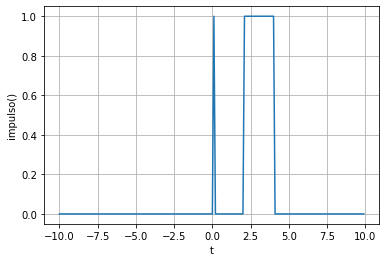

In [66]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i+rect_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

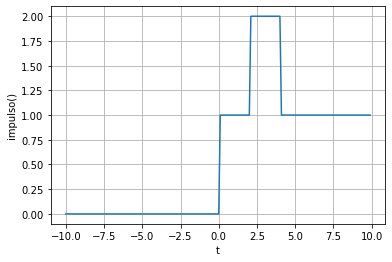

In [67]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,rect_i+u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

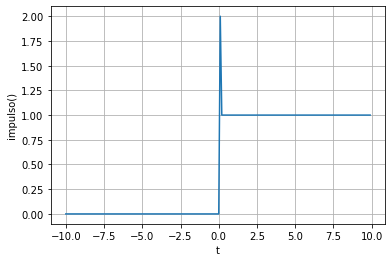

In [68]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i+u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

##### Resta

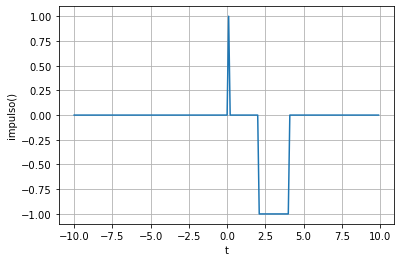

In [69]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i-rect_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

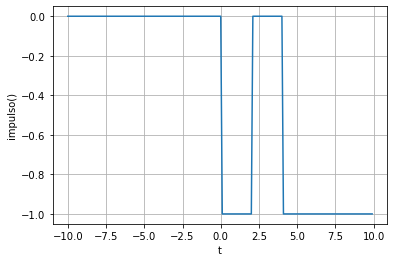

In [70]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,rect_i-u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

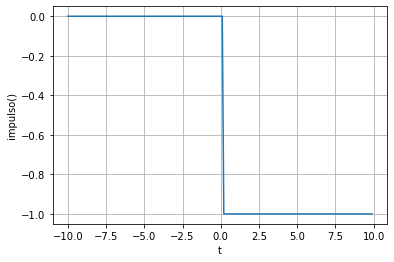

In [71]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i-u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

##### Producto

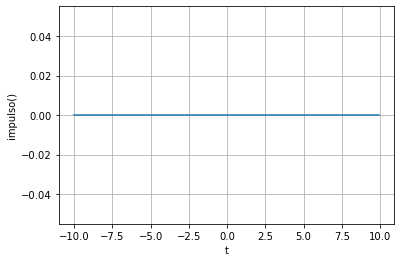

In [72]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i*rect_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

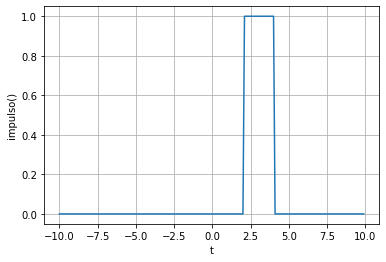

In [73]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,rect_i*u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

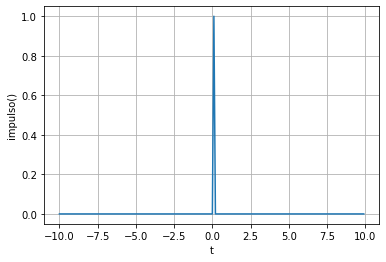

In [74]:
# SALIDA - GRAFICA
# plt.plot(ti,impulso_i)
plt.plot(ti,impulso_i*u0_i)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

##### Convolucion

<Figure size 432x288 with 0 Axes>

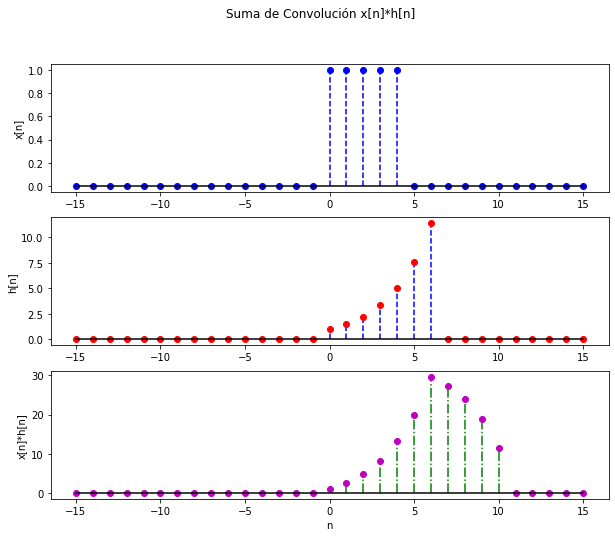

In [78]:
# Respuesta a impulsos - forma discreta
# Ejemplo Oppenheim Ejemplo 2.3 p83/pdf111
import numpy as np
import matplotlib.pyplot as plt

# INGRESO
# Rango [a,b], simétrico a 0
b = 15 ; a = -b

alfa = 1.5
u = lambda n: np.piecewise(n,n>=0,[1,0])

x = lambda n: u(n)-u(n-5)
h = lambda n: (alfa**n)*(u(n)-u(n-7))


# PROCEDIMIENTO
ni = np.arange(a,b+1,1)
xi = x(ni)
hi = h(ni)

# Suma de Convolucion x[n]*h[n]
muestras = len(xi)
yi = np.zeros(muestras, dtype=float)
for i in range(0,muestras):
    suma = 0
    for k in range(0,muestras):
        suma = suma + x(ni[k])*h(ni[i]-ni[k])
    yi[i] = suma

# yi = np.convolve(xi,hi,'same')

# SALIDA - GRAFICA

plt.figure(1)
plt.figure(figsize = (10, 8))
plt.suptitle('Suma de Convolución x[n]*h[n]')

plt.subplot(311)
plt.stem(ni,xi, linefmt='b--',
         markerfmt='bo',basefmt='k-')
plt.ylabel('x[n]')

plt.subplot(312)
plt.stem(ni,hi, linefmt='b--',
         markerfmt='ro',basefmt='k-')
plt.ylabel('h[n]')

plt.subplot(313)
plt.stem(ni,yi, linefmt='g-.',
         markerfmt='mo', basefmt='k-')

plt.ylabel('x[n]*h[n]')
plt.xlabel('n')

plt.show()

### Semana 3

#### Analisis de fourier a señal, FFT

In [16]:
import scipy.io as sio
mat = sio.loadmat('Reposo1.mat')

In [25]:
data=mat['data']

In [32]:
x=data[:,2]
t=np.arange(60001)

In [33]:
t.shape

(60001,)

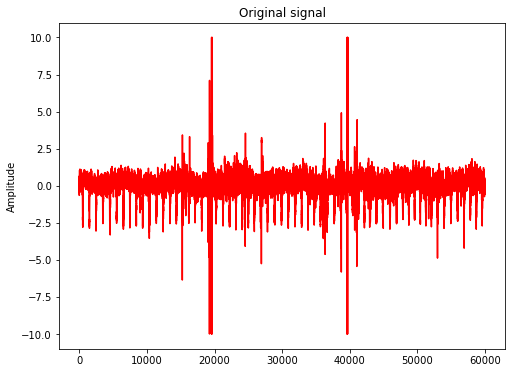

In [34]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

In [37]:
from scipy.fftpack import fftfreq
from scipy.fftpack import fft, ifft
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()


(0.0, 100.0)

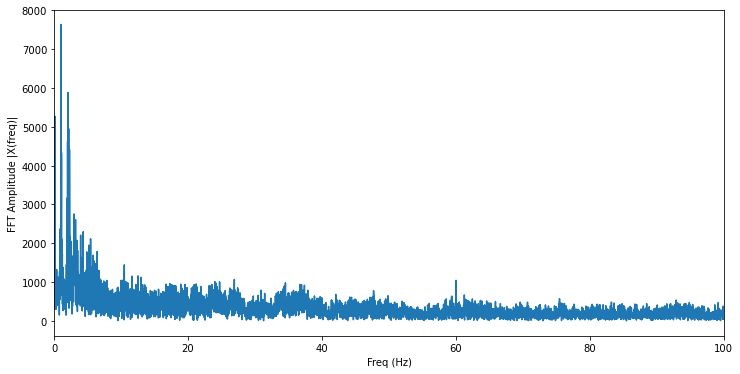

In [102]:
#sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.plot(freq, np.abs(X))#, 'b',markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)




### Semana 4

#### FFT y sisntesis

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


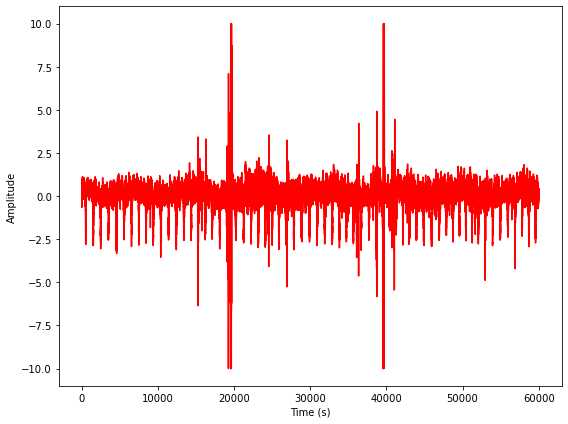

In [107]:
plt.figure(figsize = (8, 6))
t=np.arange(60001)
plt.plot(t, ifft(X),'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.xlim(10000, 15000)
plt.tight_layout()
plt.show()

## Curso 2: Filtros

### Semana 1

#### Filtros y respuesta en frecuencia de señal 

In [87]:
 from scipy import signal
import matplotlib.pyplot as plt

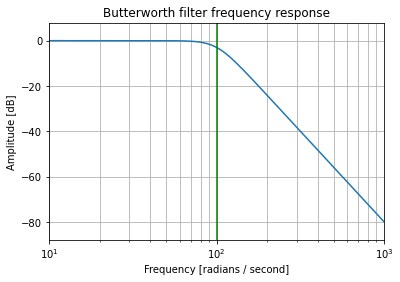

In [88]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

### Semana 2

#### Diseño de filtros digitales, FIR e IIR para señal

In [86]:
from scipy import signal
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

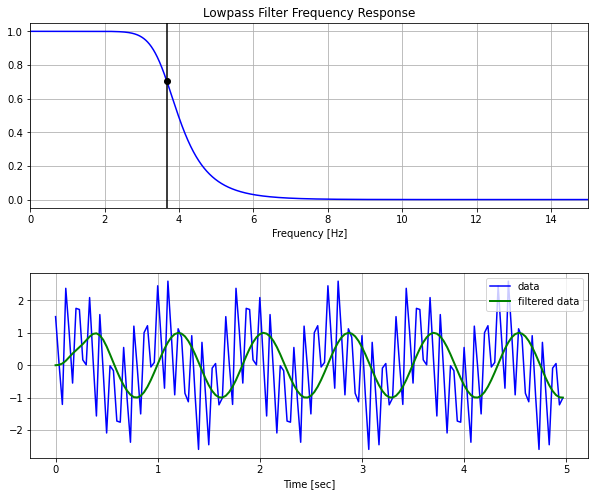

In [94]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Setting standard filter requirements.
order = 6
fs = 30.0       
cutoff = 3.667  

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
plt.figure(1)
plt.figure(figsize = (10, 8))
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Creating the data for filteration
T = 5.0         # value taken in seconds
n = int(T * fs) # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [96]:
data=mat['data']
x=data[:,2]
t=np.arange(60001)

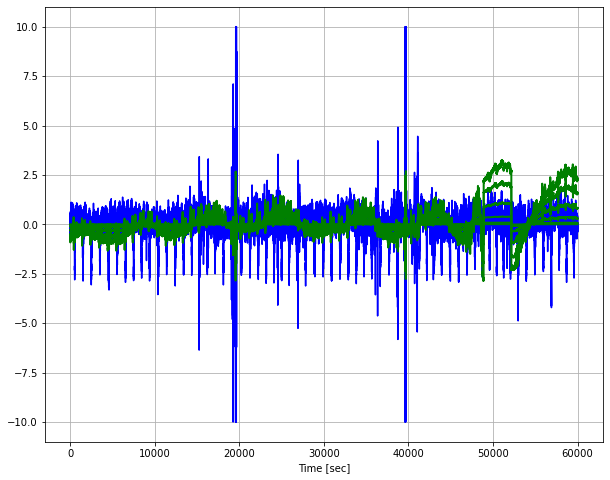

In [99]:
# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)
plt.figure(figsize = (10, 8))
plt.plot(t,x, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()

plt.subplots_adjust(hspace=0.35)
plt.show()

### Semana 3

#### Procesamiento de señales estocasticas y adaptativos, PSD, filtros adaptativo LMS 